In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KDTree
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.tree import DecisionTreeClassifier

In [9]:
data=pd.read_csv(r"C:\Users\Chuxu\ESE527\googleplaystore.csv")
data2=pd.read_csv(r"C:\Users\Chuxu\ESE527\googleplaystore_user_reviews.csv")
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
data.shape

(10841, 13)

In [11]:
data=data.drop(data.index[10472])

In [12]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price','Size']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_8496\189241531.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col]=data[col].str.replace(item,'')


In [13]:
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000

In [14]:
data['Installs']=data['Installs'].astype('int')
data['Price']=data['Price'].astype('float')
data['Reviews']=data['Reviews'].astype('int')

In [15]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [16]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
                   'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [17]:
data = data.dropna() # Remove all null value

In [18]:
data.shape

(7723, 13)

In [ ]:
data.head(5)

In [19]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})
null

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


In [20]:
data['Type_code'] = pd.factorize(data['Type'])[0]
data['Type_code'].unique()

array([0, 1], dtype=int64)

<Figure size 1500x800 with 0 Axes>

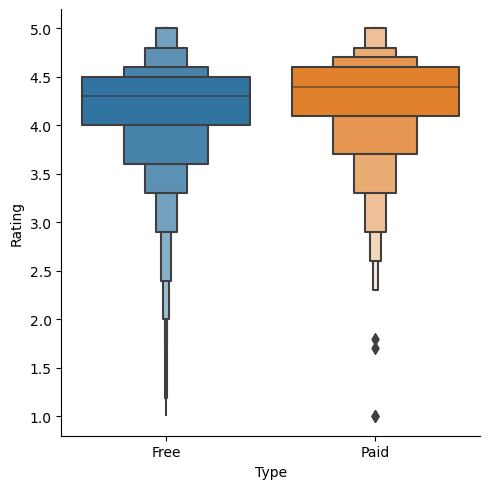

In [23]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data.sort_values('Rating',ascending=False), kind='boxen')

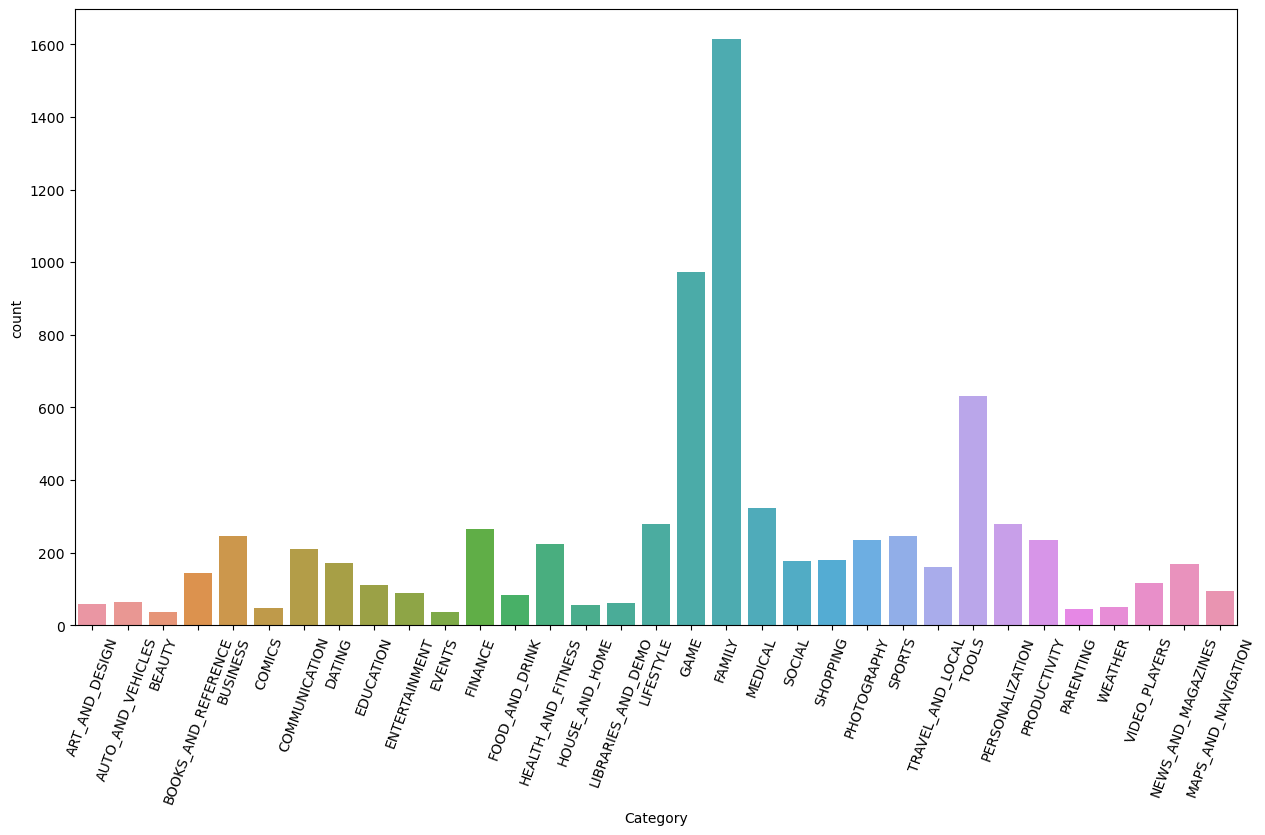

In [25]:
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(x='Category',data=data)
plt.xticks(rotation=70)
plt.show()

In [ ]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
Num_features=[col for col in data.columns if data[col].dtype!='O']
Num_data = data[Num_features].drop(['Last Updated'],axis=1)
Num_data.head()

In [ ]:
features=Num_data.drop(['Rating'],axis=1)
label=Num_data['Rating']
train_X,test_X,train_Y,test_Y=train_test_split(features,label,test_size=0.2,random_state=556)

In [ ]:
rf = RandomForestRegressor(n_estimators=10,
               criterion='squared_error',
               max_depth=None,
               min_samples_split=10,
               min_weight_fraction_leaf=0.02)
rf.fit(train_X, train_Y)
y_pred = rf.predict(test_X)
#rf.score(test_Y,y_pred)
print('random forest accuracy:',rf.score(test_X, test_Y))

In [ ]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = train_X.columns
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

In [ ]:
features=Num_data.iloc[:,0:2]
label=Num_data['Rating']
train_X,test_X,train_Y,test_Y=train_test_split(features,label,test_size=0.2,random_state=556)

In [ ]:
rf = RandomForestRegressor(n_estimators=10,
               criterion='squared_error',
               max_depth=None,
               min_samples_split=10,
               min_weight_fraction_leaf=0.02)
rf.fit(train_X, train_Y)
y_pred = rf.predict(test_X)
#rf.score(test_Y,y_pred)
print('random forest accuracy:',rf.score(test_X, test_Y))